# Challenge ONE 2: Telecom X

## 📌 Extracción

In [1]:
## Imports
import pandas as pd
import json 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [109]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
df = pd.json_normalize(data=json.loads(response.text))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 Transformación

### Conocer el conjunto de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
# Verificación de los valores únicos en las columnas para conocer su contenido
for column in df.columns[1:]:
    unique_values = df[column].sort_values().unique()
    if len(unique_values) < 10:
        print(column, '\n',unique_values, '\n')
    else:
        print(column, '\nMin:',min(unique_values), '\t Max:', max(unique_values), '\n')

Churn 
 ['' 'No' 'Yes'] 

customer.gender 
 ['Female' 'Male'] 

customer.SeniorCitizen 
 [0 1] 

customer.Partner 
 ['No' 'Yes'] 

customer.Dependents 
 ['No' 'Yes'] 

customer.tenure 
Min: 0 	 Max: 72 

phone.PhoneService 
 ['No' 'Yes'] 

phone.MultipleLines 
 ['No' 'No phone service' 'Yes'] 

internet.InternetService 
 ['DSL' 'Fiber optic' 'No'] 

internet.OnlineSecurity 
 ['No' 'No internet service' 'Yes'] 

internet.OnlineBackup 
 ['No' 'No internet service' 'Yes'] 

internet.DeviceProtection 
 ['No' 'No internet service' 'Yes'] 

internet.TechSupport 
 ['No' 'No internet service' 'Yes'] 

internet.StreamingTV 
 ['No' 'No internet service' 'Yes'] 

internet.StreamingMovies 
 ['No' 'No internet service' 'Yes'] 

account.Contract 
 ['Month-to-month' 'One year' 'Two year'] 

account.PaperlessBilling 
 ['No' 'Yes'] 

account.PaymentMethod 
 ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check'] 

account.Charges.Monthly 
Min: 18.25 	 Max: 118.75 

ac

**Diccionario de datos del conjunto de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Comprobación de incoherencias en los datos

In [5]:
# Busqueda de valores nulos
for column in df.columns:
    null_values = df[column].isnull().sum()
    if null_values > 0:
        print(column, '-', null_values, '\n')
    else:
        print(column, '-', 'No null values', '\n')

customerID - No null values 

Churn - No null values 

customer.gender - No null values 

customer.SeniorCitizen - No null values 

customer.Partner - No null values 

customer.Dependents - No null values 

customer.tenure - No null values 

phone.PhoneService - No null values 

phone.MultipleLines - No null values 

internet.InternetService - No null values 

internet.OnlineSecurity - No null values 

internet.OnlineBackup - No null values 

internet.DeviceProtection - No null values 

internet.TechSupport - No null values 

internet.StreamingTV - No null values 

internet.StreamingMovies - No null values 

account.Contract - No null values 

account.PaperlessBilling - No null values 

account.PaymentMethod - No null values 

account.Charges.Monthly - No null values 

account.Charges.Total - No null values 



In [6]:
# Busqueda de valores incoherentes en customerID
print(f"Indices duplicados: {len(df[~df['customerID'].isin(df['customerID'])])}")
filtro = df['customerID'].str.match(r'\d{4}\-\D{4}')
print(f"Indices con formato incorrecto: {len(df[~filtro])}")
df['customerID'] = df['customerID'].str.upper().str.strip()

Indices duplicados: 0
Indices con formato incorrecto: 0


In [7]:
# Busqueda de valores incoherentes en Churn
filtro = df['Churn'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")
print("Lista de valores con inconsistencias")
print(df.loc[~filtro, 'Churn'].value_counts())

Indices con valores incoherentes: 224
Lista de valores con inconsistencias
Churn
    224
Name: count, dtype: int64


In [8]:
# Buscando valores inconsistentes en customer.gender
filtro = df['customer.gender'].isin(['Male', 'Female'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [9]:
# Buscando valores inconsistentes en customer.SeniorCitizen
filtro = df['customer.SeniorCitizen'].isin([0, 1])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [10]:
# Buscando valores inconsistentes en customer.Partner
filtro = df['customer.Partner'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [11]:
# Buscando valores inconsistentes en customer.Dependents
filtro = df['customer.Dependents'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [12]:
# Buscando valores inconsistentes en customer.tenure
filtro = df['customer.tenure'] < 0
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [13]:
# Buscando valores inconsistentes en phone.PhoneService
filtro = df['phone.PhoneService'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [14]:
# Buscando valores inconsistentes en phone.MultipleLines
filtro = df['phone.MultipleLines'].isin(['Yes', 'No', 'No phone service'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [15]:
# Buscando valores inconsistentes en internet.InternetService
filtro = df['internet.InternetService'].isin(['DSL', 'Fiber optic', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [16]:
# Buscando valores inconsistentes en internet.OnlineSecurity
filtro = (~df['internet.OnlineSecurity'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.OnlineSecurity'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [17]:
# Buscando valores inconsistentes en internet.OnlineBackup
filtro = (~df['internet.OnlineBackup'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.OnlineBackup'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [18]:
# Buscando valores inconsistentes en internet.DeviceProtection
filtro = (~df['internet.DeviceProtection'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.DeviceProtection'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")


Indices con valores incoherentes: 0


In [19]:
# Buscando valores inconsistentes en internet.TechSupport
filtro = (~df['internet.TechSupport'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.TechSupport'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [20]:
# Buscando valores inconsistentes en internet.StreamingTV
filtro = (~df['internet.StreamingTV'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.StreamingTV'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [21]:
# Buscando valores inconsistentes en internet.StreamingMovies
#filtro = df['internet.StreamingMovies'].isin(['Yes', 'No', 'No internet service'])
filtro = (~df['internet.StreamingMovies'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.StreamingMovies'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")


Indices con valores incoherentes: 0


In [22]:
# Buscando valores inconsistentes en account.Contract
filtro = df['account.Contract'].isin(['Month-to-month', 'One year', 'Two year'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [23]:
# Buscando valores inconsistentes en account.PaperlessBilling
filtro = df['account.PaperlessBilling'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [24]:
# Buscando valores inconsistentes en account.PaymentMethod
filtro = df['account.PaymentMethod'].isin(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [25]:
# Buscando valores inconsistentes en account.Charges.Monthly
print(f"Min. Values: {df['account.Charges.Monthly'].min()}, Max. Values: {df['account.Charges.Monthly'].max()}")

Min. Values: 18.25, Max. Values: 118.75


In [26]:
# Buscando valores inconsistentes en account.Charges.Total
filtro = (~df['account.Charges.Total'].str.match(r"\d+(?:\.\d+)?")) | (df['account.Charges.Total'].isna())
print(f"Indices con valores incoherentes: {len(df[filtro])}")
print("Lista de valores con inconsistencias")
print(df.loc[filtro, 'account.Charges.Total'].value_counts())


Indices con valores incoherentes: 11
Lista de valores con inconsistencias
account.Charges.Total
    11
Name: count, dtype: int64


### Manejo de inconsistencias

In [27]:
# Manejo de valores faltantes para Churn
filtro = df['Churn'].isin(['Yes', 'No'])
df.drop(df[~filtro].index, inplace=True)

In [28]:
# Completar número sin decimales
df['account.Charges.Total'] = df['account.Charges.Total'].replace('\.$', '.0', regex=True)
# Llenar valores sin total
filtro = df['account.Charges.Total'].astype(str).str.match(r'^\d+\.?\d?$')
df.loc[~filtro, 'account.Charges.Total'] = df['customer.tenure'] * df['account.Charges.Monthly']

# Convertir a tipo numérico
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)

### Columna cuentas diarias

In [29]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30

### Estandarización y transformación de datos

In [30]:
# Se transforman valores de Yes y No a numéricos
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer.Partner'] = df['customer.Partner'].map({'Yes': 1, 'No': 0})
df['customer.Dependents'] = df['customer.Dependents'].map({'Yes': 1, 'No': 0})
df['phone.PhoneService'] = df['phone.PhoneService'].map({'Yes': 1, 'No': 0})
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Se transforma el genero de Female y Male a numéricos
df['customer.gender'] = df['customer.gender'].map({'Female': 1, 'Male': 0})

# One Hot Encoding para las columnas categóricas
categorical_columns = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False, dtype=np.int8)

In [31]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias',
       'phone.MultipleLines_No', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_DSL',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_No',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.Streamin

In [32]:
columnas = ['ID Cliente', 'Abandono', 'Género', 'Veterano', 
            'Casado', 'Dependientes Económicos', 'Antigüedad (meses)',
            'Servicio Telefónico', 'Factura Electrónica',
            'Cargo Mensual', 'Cargo Total', 'Cuentas Diarias', 
            'Multilinea Telefónica: No', 'Multilinea Telefónica: Sin teléfono', 
            'Multilinea Telefónica: Sí', 'Internet: DSL',
            'Internet: Fibra Óptica', 'Internet: No',
            'Seguridad en Linea: No',
            'Seguridad en Linea: Sin Internet',
            'Seguridad en Linea: Sí', 'Respaldo en Linea: No',
            'Respaldo en Linea: Sin Internet',
            'Respaldo en Linea: Sí', 'Protección de Dispositivo: No',
            'Protección de Dispositivo: Sin Internet',
            'Protección de Dispositivo: Sí', 'Soporte Técnico: No',
            'Soporte Técnico: Sin Internet', 'Soporte Técnico: Sí',
            'TV en Streaming: No', 'TV en Streaming: Sin Internet',
            'TV en Streaming: Sí', 'Películas en Streaming: No',
            'Películas en Streaming: Sin Internet',
            'Películas en Streaming: Sí', 'Contrato: Mes a Mes',
            'Contrato: Un Año', 'Contrato: Dos Años',
            'Método de Pago: Transferencia Bancaria',
            'Método de Pago: Tarjeta de crédito',
            'Método de Pago: Cheque electrónico',
            'Método de Pago: Cheque enviado por correo']

df.columns = columnas
df.head()

,ID Cliente,Abandono,Género,Veterano,Casado,Dependientes Económicos,Antigüedad (meses),Servicio Telefónico,Factura Electrónica,Cargo Mensual,...,Películas en Streaming: No,Películas en Streaming: Sin Internet,Películas en Streaming: Sí,Contrato: Mes a Mes,Contrato: Un Año,Contrato: Dos Años,Método de Pago: Transferencia Bancaria,Método de Pago: Tarjeta de crédito,Método de Pago: Cheque electrónico,Método de Pago: Cheque enviado por correo
0,0002-ORFBO,0,1,0,1,1,9,1,1,65.6,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,0,0,0,0,9,1,0,59.9,...,0,0,1,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,0,4,1,1,73.9,...,1,0,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,0,1,1,0,13,1,1,98.0,...,0,0,1,1,0,0,0,0,1,0
4,0013-EXCHZ,1,1,1,1,0,3,1,1,83.9,...,1,0,0,1,0,0,0,0,0,1


## 📊 Carga y análisis

### Análisis descriptivo

In [33]:
pd.options.display.max_columns = None

In [34]:
columnas_numericas = ["Antigüedad (meses)", "Cargo Mensual", "Cargo Total", "Cuentas Diarias"]
df[columnas_numericas].describe().style

,Antigüedad (meses),Cargo Mensual,Cargo Total,Cuentas Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2280.304338,2.158723
std,24.559481,30.090047,2266.609261,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,395.850000,1.183333
50%,29.000000,70.350000,1387.000000,2.345000
75%,55.000000,89.850000,3782.650000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [35]:
df[[col for col in df.columns[1:] if col not in columnas_numericas]].astype(bool).describe()

,Abandono,Género,Veterano,Casado,Dependientes Económicos,Servicio Telefónico,Factura Electrónica,Multilinea Telefónica: No,Multilinea Telefónica: Sin teléfono,Multilinea Telefónica: Sí,Internet: DSL,Internet: Fibra Óptica,Internet: No,Seguridad en Linea: No,Seguridad en Linea: Sin Internet,Seguridad en Linea: Sí,Respaldo en Linea: No,Respaldo en Linea: Sin Internet,Respaldo en Linea: Sí,Protección de Dispositivo: No,Protección de Dispositivo: Sin Internet,Protección de Dispositivo: Sí,Soporte Técnico: No,Soporte Técnico: Sin Internet,Soporte Técnico: Sí,TV en Streaming: No,TV en Streaming: Sin Internet,TV en Streaming: Sí,Películas en Streaming: No,Películas en Streaming: Sin Internet,Películas en Streaming: Sí,Contrato: Mes a Mes,Contrato: Un Año,Contrato: Dos Años,Método de Pago: Transferencia Bancaria,Método de Pago: Tarjeta de crédito,Método de Pago: Cheque electrónico,Método de Pago: Cheque enviado por correo
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
freq,5174,3555,5901,3641,4933,6361,4171,3653,6361,4072,4622,3947,5517,3545,5517,5024,3955,5517,4614,3948,5517,4621,3570,5517,4999,4233,5517,4336,4258,5517,4311,3875,5570,5348,5499,5521,4678,5431


### Distribución de Evasión

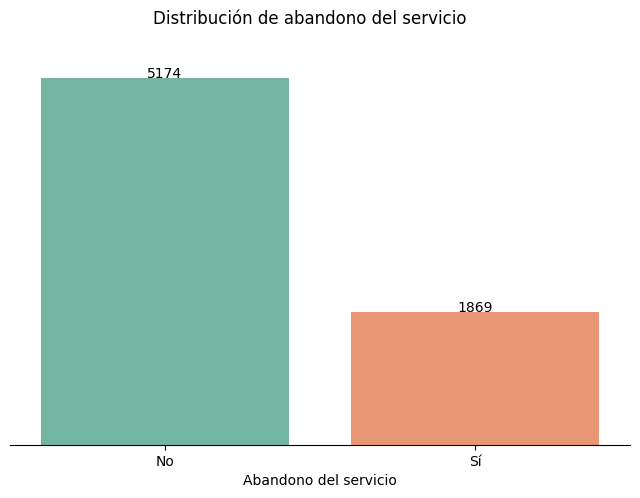

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución de abandono del servicio')
sns.countplot(data=df, x='Abandono', hue='Abandono', palette='Set2')
ax.set_xlabel('Abandono del servicio')
ax.set_ylabel('')
ax.xaxis.set_ticks([0, 1])
ax.xaxis.set_ticklabels(['No', 'Sí'])
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks(ticks=[])
ax.legend_.remove()
for i, j in enumerate(df['Abandono'].value_counts().sort_index()):
    ax.text(i, j + 5, str(j), ha='center')
sns.despine(top=True, left=True, right=True)
plt.show()

### Recuento de evasíon por variables categóricas

In [37]:
def graficar_abandono(df, titulo, labels = ['No', 'Sí'], xmin=0, ymax=5000):    
    """
    Grafica la distribución de abandono en un DataFrame.

    Args:
        df: DataFrame con los datos
        titulo: Título para el gráfico
        labels: Etiquetas para las categorías de abandono
    """
    # Preparar datos para gráfica agrupada
    abandono_df = df.unstack(level='Abandono').fillna(0).astype(int)
    # Etiquetas a partir del índice (0 -> No, 1 -> Sí)
    labels = [labels[0] if g == 0 else labels[1] for g in abandono_df.index]

    x = np.arange(len(abandono_df))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,4))

    ax.bar(x - width/2, abandono_df.get(0, 0), width, label='No', color='C0')
    ax.bar(x + width/2, abandono_df.get(1, 0), width, label='Sí', color='C1')

    ax.set_title(f'Distribución de abandono por {titulo}', fontsize=16)
    ax.set_xlabel(titulo, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylim(bottom=xmin, top=ymax)
    ax.yaxis.set_ticks(ticks=[])
    ax.legend(title='Abandono', fontsize=12)
    # Anotar valores encima de las barras
    offset = max(abandono_df.values.max() * 0.02, 5)
    for i in range(len(x)):
        ax.text(x[i] - width/2, abandono_df.get(0, 0).iloc[i] + offset, str(abandono_df.get(0, 0).iloc[i]), ha='center')
        ax.text(x[i] + width/2, abandono_df.get(1, 0).iloc[i] + offset, str(abandono_df.get(1, 0).iloc[i]), ha='center')

    sns.despine(top=True, right=True, left=True)
    plt.tight_layout()
    sns.set_palette('Set2')
    plt.show()

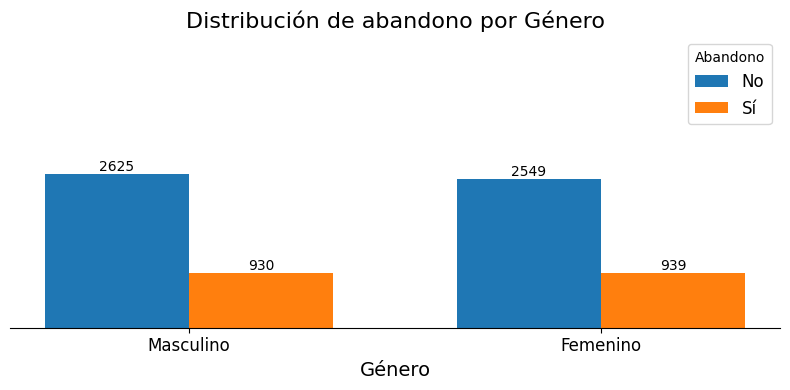

In [38]:
# Distribución de abandono según el genero
abandono_genero = df.groupby('Género')['Abandono'].value_counts()
graficar_abandono(abandono_genero, 'Género', labels=['Masculino', 'Femenino'])

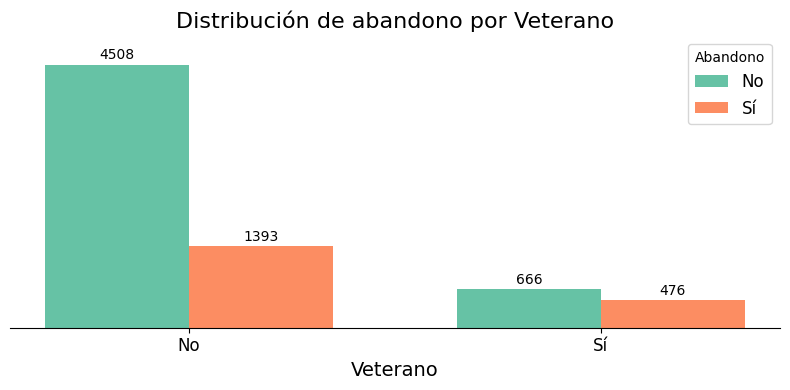

In [39]:
# Distribución de abandono según el veterano
abandono_veterano = df.groupby('Veterano')['Abandono'].value_counts()
# Preparar datos para gráfica agrupada
graficar_abandono(abandono_veterano, 'Veterano', labels=['No', 'Sí'])

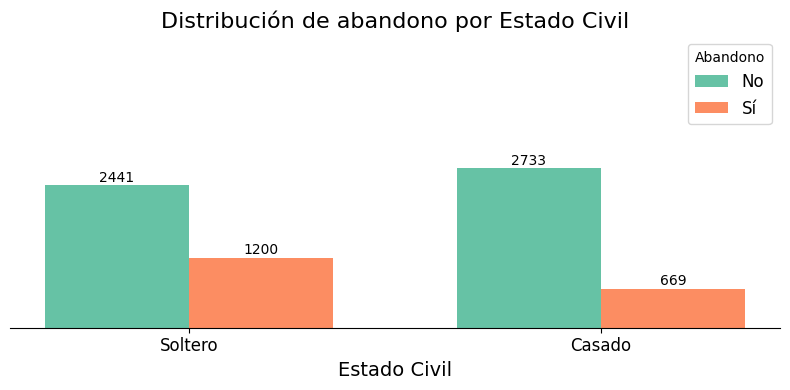

In [40]:
# Distribución de abandono según el estado civil
abandono_estado_civil = df.groupby('Casado')['Abandono'].value_counts()
graficar_abandono(abandono_estado_civil, 'Estado Civil', labels=['Soltero', 'Casado'])

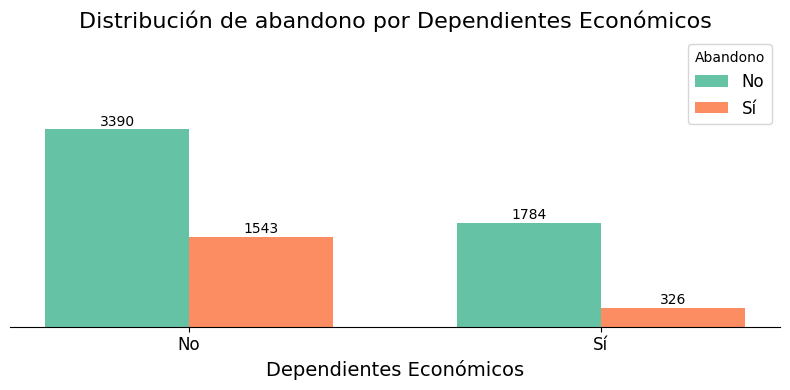

In [41]:
# Distribución de abandono según el estado civil
abandono_dependientes = df.groupby('Dependientes Económicos')['Abandono'].value_counts()
graficar_abandono(abandono_dependientes, 'Dependientes Económicos', labels=['No', 'Sí'])

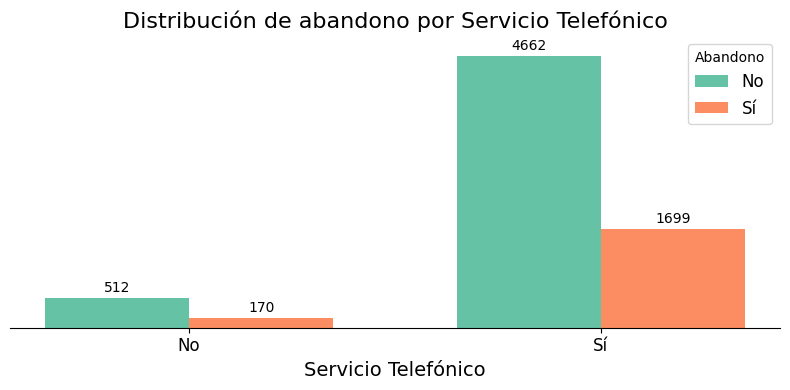

In [42]:
abandono_telefono = df.groupby('Servicio Telefónico')['Abandono'].value_counts()
graficar_abandono(abandono_telefono, 'Servicio Telefónico', labels=['No', 'Sí'])

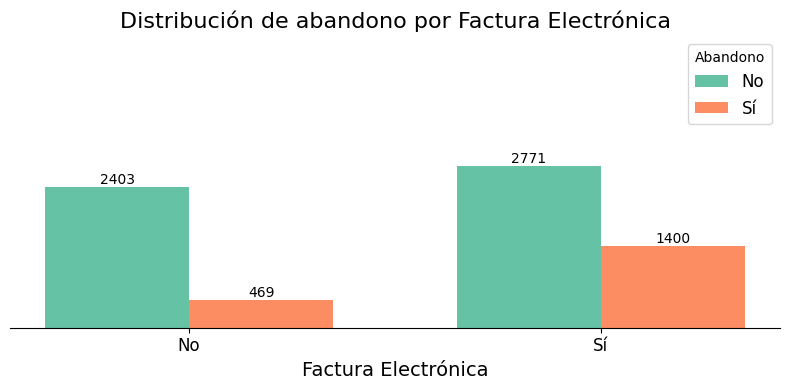

In [43]:
abandono_factura = df.groupby('Factura Electrónica')['Abandono'].value_counts()
graficar_abandono(abandono_factura, 'Factura Electrónica', labels=['No', 'Sí'])

In [44]:
def graficar_abandono_ohe(df, prefijo, titulo, labels_map=None, ymin=0, ymax=5000):
    """
    Grafica abandono para columnas One Hot Encoding con un prefijo común.
    
    Args:
        df: DataFrame con los datos
        prefijo: Prefijo de las columnas OHE (ej: 'Multilinea Telefónica')
        titulo: Título para el gráfico
        labels_map: Diccionario opcional para renombrar etiquetas del eje x
    """
    columnas = df.columns[df.columns.str.startswith(prefijo) | df.columns.isin(['Abandono'])]
    df_subset = df[columnas]
    
    ohe_cols = [col for col in columnas if col != 'Abandono']
    resultado = {}
    for col in ohe_cols:
        resultado[col] = df_subset[df_subset[col] == 1]['Abandono'].value_counts().sort_index()
    
    conteo_abandono = pd.DataFrame(resultado).T
    conteo_abandono.columns = ['No', 'Sí']
    
    if labels_map:
        conteo_abandono.index = [labels_map.get(col, col) for col in conteo_abandono.index]
    else:
        conteo_abandono.index = [col.replace(f'{prefijo}: ', '') for col in conteo_abandono.index]

    x = np.arange(len(conteo_abandono))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(x - width/2, conteo_abandono['No'], width=width, label='No')
    ax.bar(x + width/2, conteo_abandono['Sí'], width=width, label='Sí')

    ax.set_title(f'Distribución de abandono por {titulo}', fontsize=16)
    ax.set_xlabel(titulo, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(conteo_abandono.index, fontsize=12)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.yaxis.set_ticks(ticks=[])
    ax.legend(title='Abandono', fontsize=12)

    offset = max(conteo_abandono.values.max() * 0.02, 5)
    for i in range(len(x)):
        ax.text(x[i] - width/2, conteo_abandono['No'].iloc[i] + offset, str(conteo_abandono['No'].iloc[i]), ha='center')
        ax.text(x[i] + width/2, conteo_abandono['Sí'].iloc[i] + offset, str(conteo_abandono['Sí'].iloc[i]), ha='center')

    sns.despine(top=True, right=True, left=True)
    plt.tight_layout()
    sns.set_palette('Set2')
    plt.show()

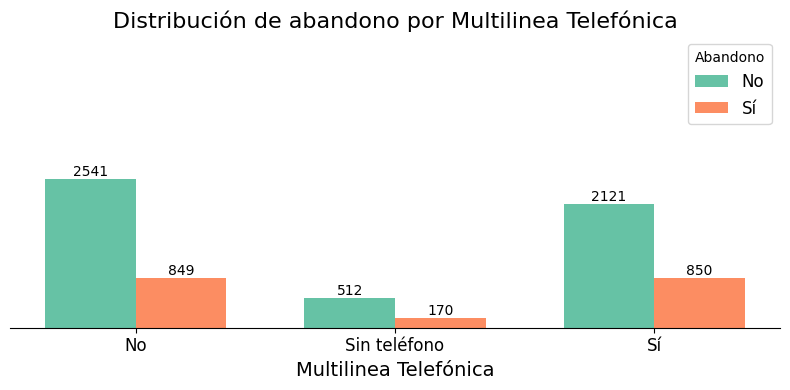

In [45]:
graficar_abandono_ohe(df, 'Multilinea Telefónica', 'Multilinea Telefónica')

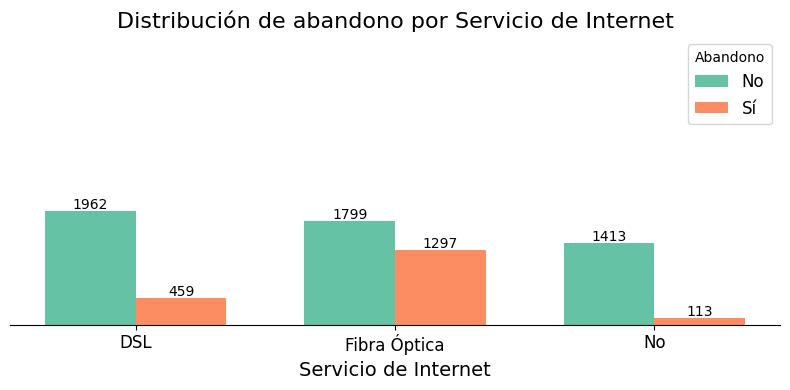

In [46]:
graficar_abandono_ohe(df, 'Internet', 'Servicio de Internet')

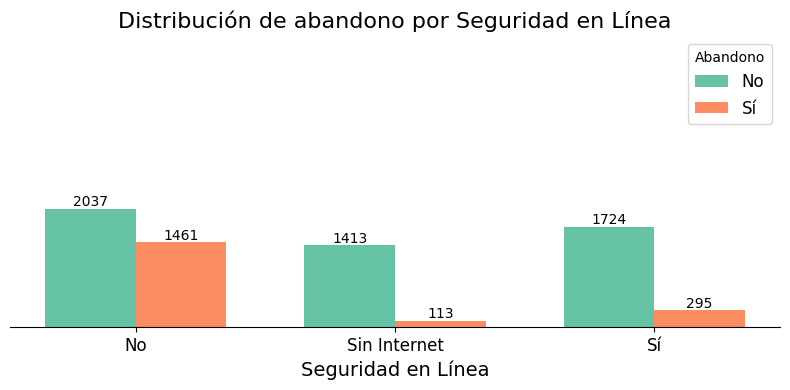

In [47]:
graficar_abandono_ohe(df, 'Seguridad en Linea', 'Seguridad en Línea')

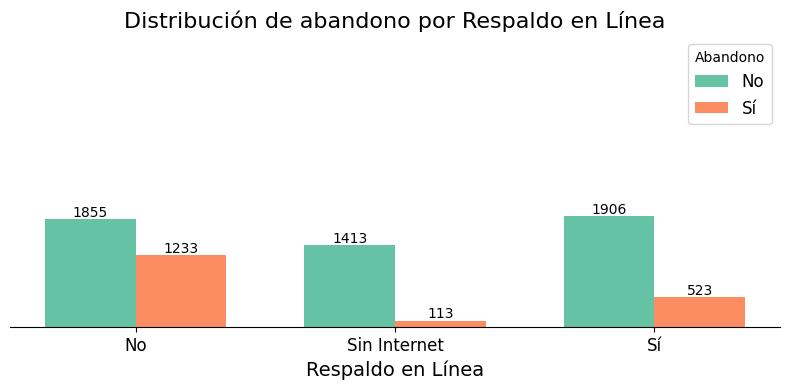

In [48]:
graficar_abandono_ohe(df, 'Respaldo en Linea', 'Respaldo en Línea')

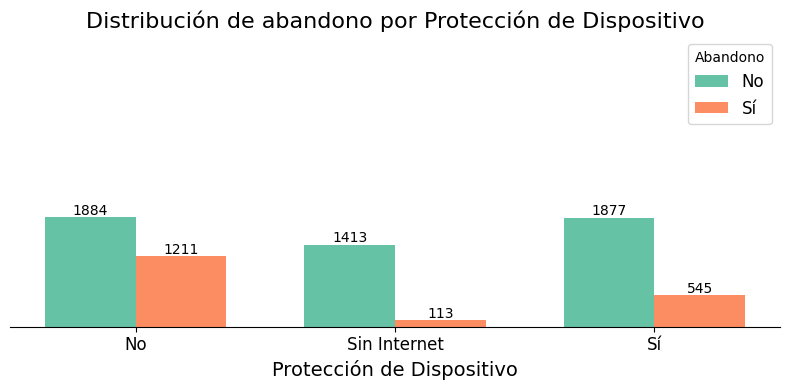

In [49]:
graficar_abandono_ohe(df, 'Protección de Dispositivo', 'Protección de Dispositivo')

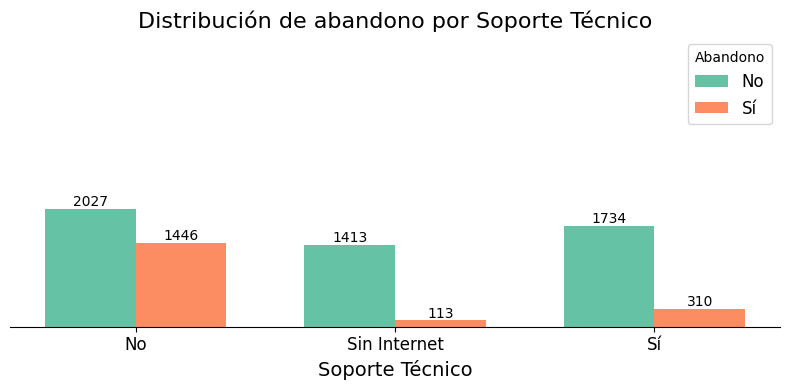

In [50]:
graficar_abandono_ohe(df, 'Soporte Técnico', 'Soporte Técnico')

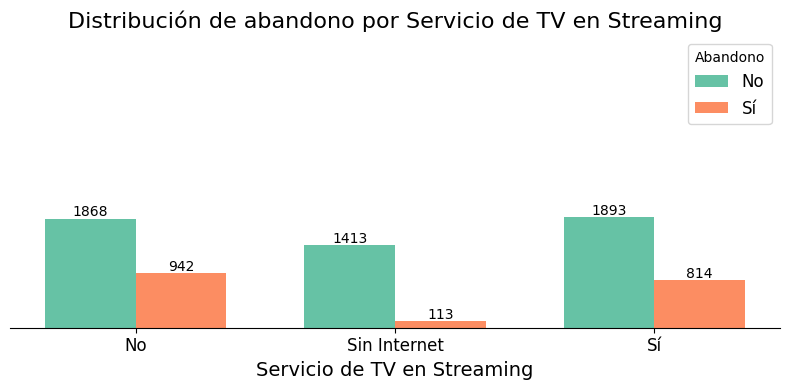

In [51]:
graficar_abandono_ohe(df, 'TV en Streaming', 'Servicio de TV en Streaming')

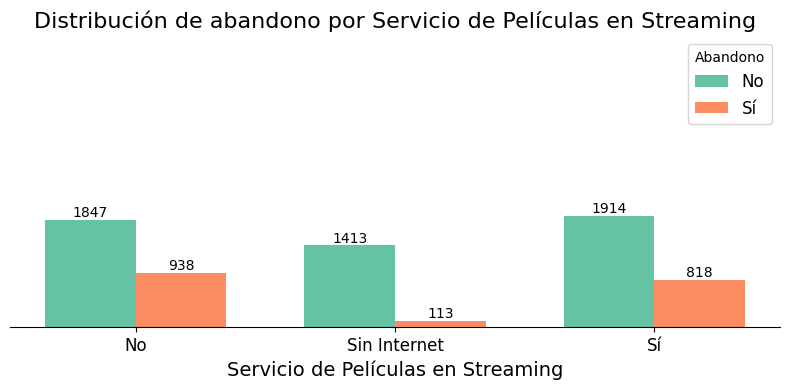

In [52]:
graficar_abandono_ohe(df, 'Películas en Streaming', 'Servicio de Películas en Streaming')

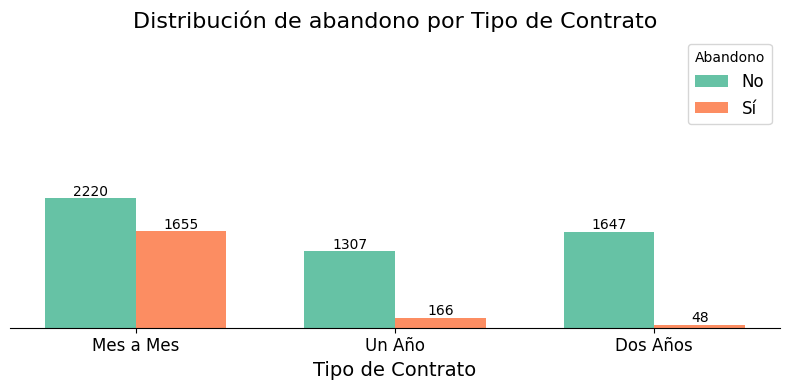

In [53]:
graficar_abandono_ohe(df, 'Contrato', 'Tipo de Contrato')

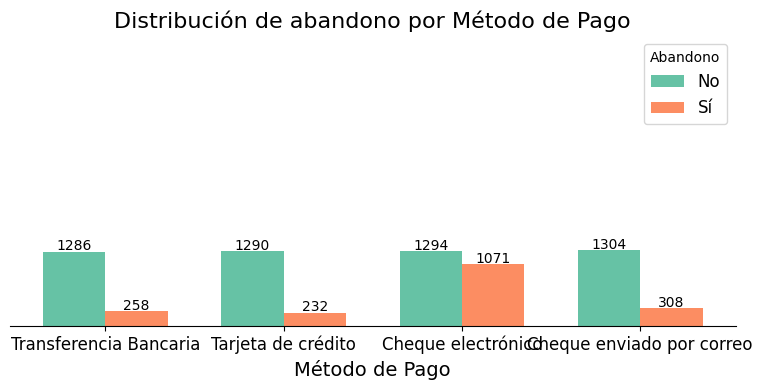

In [54]:
graficar_abandono_ohe(df, 'Método de Pago', 'Método de Pago')

### Conteo de evasión por variables numéricas

In [57]:
df_numericas = df[columnas_numericas + ['Abandono']]
df_numericas.head()

,Antigüedad (meses),Cargo Mensual,Cargo Total,Cuentas Diarias,Abandono
0,9,65.6,593.3,2.186667,0
1,9,59.9,542.4,1.996667,0
2,4,73.9,295.6,2.463333,1
3,13,98.0,1274.0,3.266667,1
4,3,83.9,267.4,2.796667,1


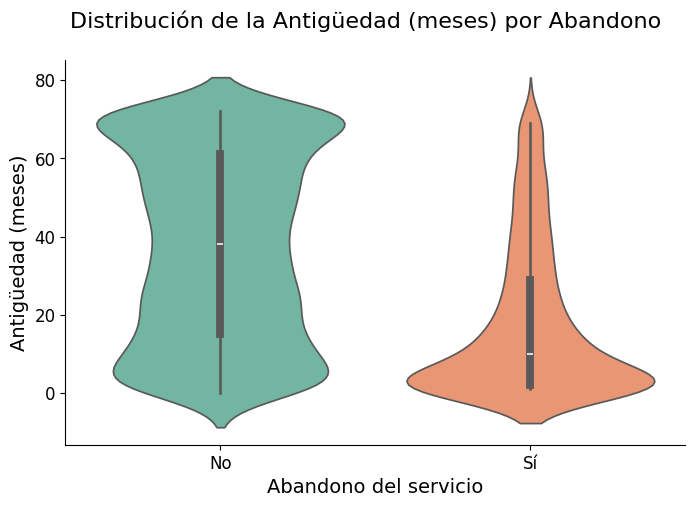

In [85]:
# Distribución de la variable 'Antigüedad (meses)' según 'Abandono'
filtro = df['Abandono'] == 1
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución de la Antigüedad (meses) por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Antigüedad (meses)', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Antigüedad (meses)', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

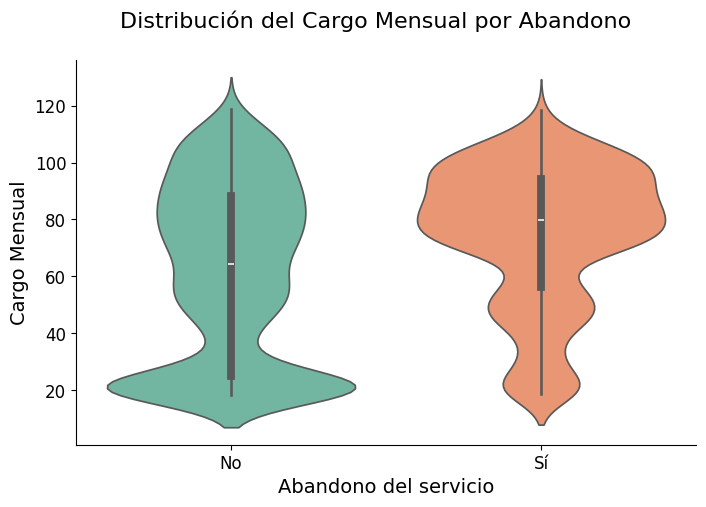

In [89]:
# Distribución de la variable 'Cargo Mensual' según 'Abandono'
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución del Cargo Mensual por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Cargo Mensual', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Cargo Mensual', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

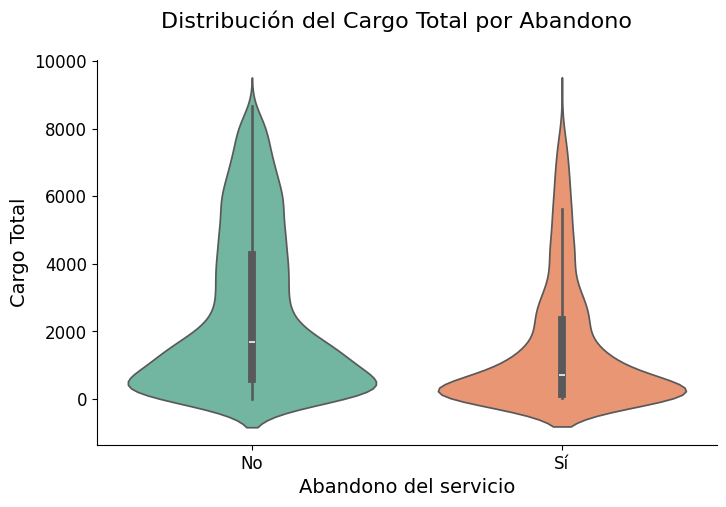

In [90]:
# Distribución de la variable 'Cargo Total' según 'Abandono'
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución del Cargo Total por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Cargo Total', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Cargo Total', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

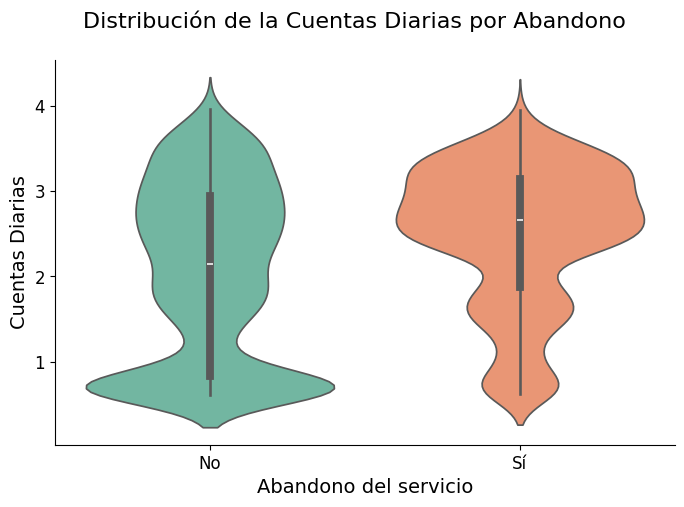

In [88]:
# Distribución de la variable Cuentas Diarias según Abandono
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución de la Cuentas Diarias por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Cuentas Diarias', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Cuentas Diarias', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

### Análisis de correlación entre variables

<Axes: >

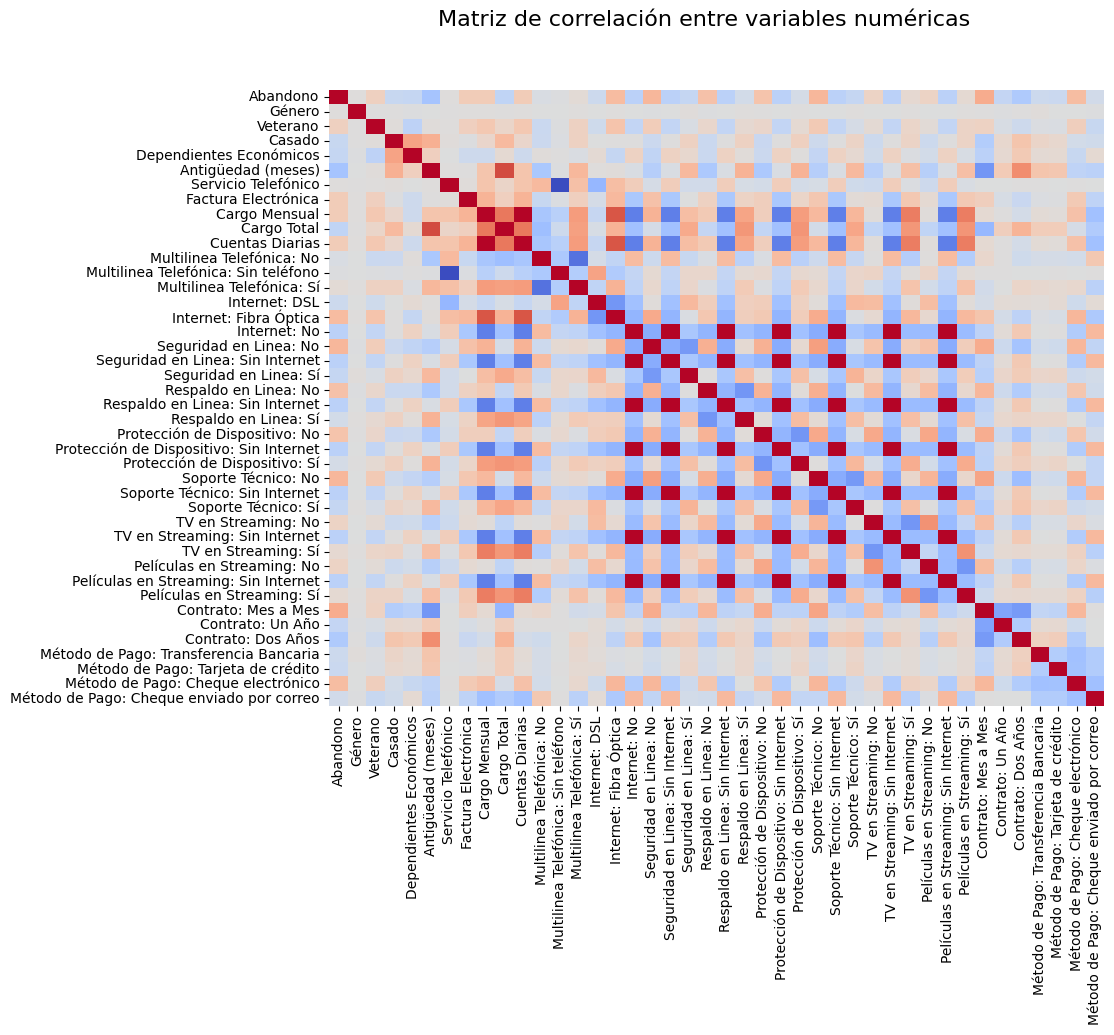

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Matriz de correlación entre variables numéricas', fontsize=16)
sns.heatmap(df.corr(numeric_only=True), annot=False, fmt=".2f", cmap='coolwarm', cbar=False)

In [101]:
df.columns

Index(['ID Cliente', 'Abandono', 'Género', 'Veterano', 'Casado',
       'Dependientes Económicos', 'Antigüedad (meses)', 'Servicio Telefónico',
       'Factura Electrónica', 'Cargo Mensual', 'Cargo Total',
       'Cuentas Diarias', 'Multilinea Telefónica: No',
       'Multilinea Telefónica: Sin teléfono', 'Multilinea Telefónica: Sí',
       'Internet: DSL', 'Internet: Fibra Óptica', 'Internet: No',
       'Seguridad en Linea: No', 'Seguridad en Linea: Sin Internet',
       'Seguridad en Linea: Sí', 'Respaldo en Linea: No',
       'Respaldo en Linea: Sin Internet', 'Respaldo en Linea: Sí',
       'Protección de Dispositivo: No',
       'Protección de Dispositivo: Sin Internet',
       'Protección de Dispositivo: Sí', 'Soporte Técnico: No',
       'Soporte Técnico: Sin Internet', 'Soporte Técnico: Sí',
       'TV en Streaming: No', 'TV en Streaming: Sin Internet',
       'TV en Streaming: Sí', 'Películas en Streaming: No',
       'Películas en Streaming: Sin Internet', 'Películas en Stre

<Axes: >

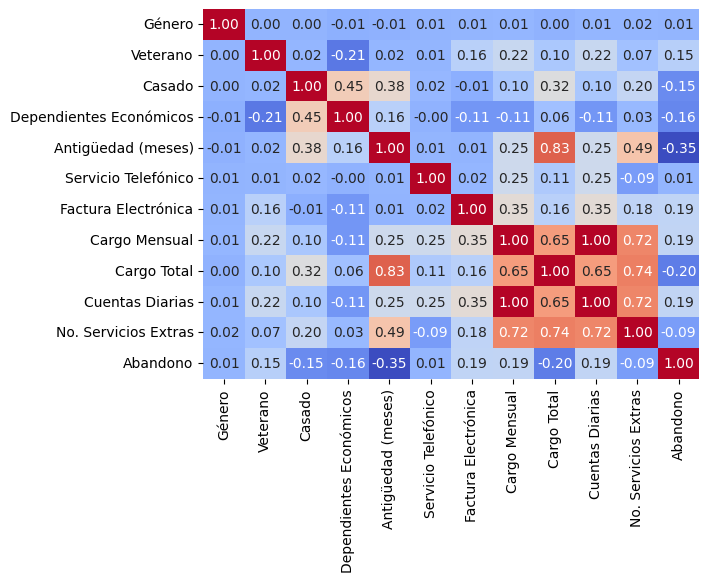

In [108]:
columnas_servicios = ['Seguridad en Linea: Sí', 'Respaldo en Linea: Sí',
       'Protección de Dispositivo: Sí', 'Soporte Técnico: Sí',
       'TV en Streaming: Sí', 'Películas en Streaming: Sí']
df['No. Servicios Extras'] = df[columnas_servicios].sum(axis=1)
corr_no_ohe = df[['Género', 'Veterano', 'Casado', 'Dependientes Económicos', 'Antigüedad (meses)', 'Servicio Telefónico', 'Factura Electrónica', 'Cargo Mensual', 'Cargo Total', 'Cuentas Diarias', 'No. Servicios Extras', 'Abandono']].corr()
sns.heatmap(corr_no_ohe, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)

## 📄Informe final